In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score
from sklearn.preprocessing import LabelEncoder,StandardScaler

Matplotlib is building the font cache; this may take a moment.


In [4]:
data=pd.read_csv("Bank_Transaction_Fraud_Detection.csv")
data.head(10)

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com
5,6c870d65-76b0-431d-bdf3-9292998e8211,Ishanvi Dar,Male,54,Gujarat,Ahmedabad,Ahmedabad Branch,Checking,af5f667c-d064-4083-bfb7-83396111a3da,25-01-2025,...,Entertainment,61258.85,Mobile Device,"Ahmedabad, Gujarat",POS,0,INR,+9198318XXXXXX,Seminar registration,ishanviXXX@XXXXX.com
6,5323737c-bbd2-423f-9c9b-e0433c8f75dc,Arya Shroff,Female,61,Delhi,New Delhi,New Delhi Branch,Business,b1355810-d246-4aeb-9932-347f32646172,04-01-2025,...,Health,36313.61,Payment Gateway Device,"New Delhi, Delhi",Desktop,0,INR,+9194785XXXXXX,Public transport pass,aryaXXX@XXXXX.com
7,c0c3d474-f6c2-4c66-9b0e-f9ba75c6f310,Jackson Shere,Male,32,Andaman and Nicobar Islands,Port Blair,Port Blair Branch,Business,c86a000c-d81f-40be-acdf-77fc072fd808,16-01-2025,...,Clothing,16948.73,Debit/Credit Card,"Port Blair, Andaman and Nicobar Islands",ATM,0,INR,+9193423XXXXXX,Online shopping,jacksonXXX@XXXXXXX.com
8,e9a82764-1253-4a46-ad34-80e3416fc801,Bhanumati Ravel,Male,52,Madhya Pradesh,Bhopal,Bhopal Branch,Business,323cc683-b0dc-40ee-a519-3b5dc96c7ed8,25-01-2025,...,Clothing,18138.71,ATM,"Bhopal, Madhya Pradesh",Mobile,0,INR,+9194374XXXXXX,Vacation payment,bhanumatiXXXXX@XXXXX.com
9,708224d5-192a-4d86-b411-8ec6d1bb274b,Meera Ganesh,Female,32,Chhattisgarh,Jagdalpur,Jagdalpur Branch,Business,9fad31ea-2770-4d80-a0ea-00972d5f02cc,02-01-2025,...,Entertainment,65801.35,Bank Branch,"Jagdalpur, Chhattisgarh",Desktop,0,INR,+9194511XXXXXX,Electronics purchase,meeraXXXXX@XXXXXXX.com


In [5]:
data=data.drop(["Customer_ID","Customer_Name","Transaction_ID","Customer_Contact","Customer_Email","Merchant_ID","Transaction_Currency"],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Gender                   200000 non-null  object 
 1   Age                      200000 non-null  int64  
 2   State                    200000 non-null  object 
 3   City                     200000 non-null  object 
 4   Bank_Branch              200000 non-null  object 
 5   Account_Type             200000 non-null  object 
 6   Transaction_Date         200000 non-null  object 
 7   Transaction_Time         200000 non-null  object 
 8   Transaction_Amount       200000 non-null  float64
 9   Transaction_Type         200000 non-null  object 
 10  Merchant_Category        200000 non-null  object 
 11  Account_Balance          200000 non-null  float64
 12  Transaction_Device       200000 non-null  object 
 13  Transaction_Location     200000 non-null  object 
 14  Devi

In [6]:
data.describe()

,Age,Transaction_Amount,Account_Balance,Is_Fraud
count,200000.000000,200000.000000,200000.000000,200000.000000
mean,44.015110,49538.015554,52437.988784,0.050440
std,15.288774,28551.874004,27399.507128,0.218852
min,18.000000,10.290000,5000.820000,0.000000
25%,31.000000,24851.345000,28742.395000,0.000000
50%,44.000000,49502.440000,52372.555000,0.000000
75%,57.000000,74314.625000,76147.670000,0.000000
max,70.000000,98999.980000,99999.950000,1.000000


In [7]:
data.isnull().sum()

Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Description    0
dtype: int64

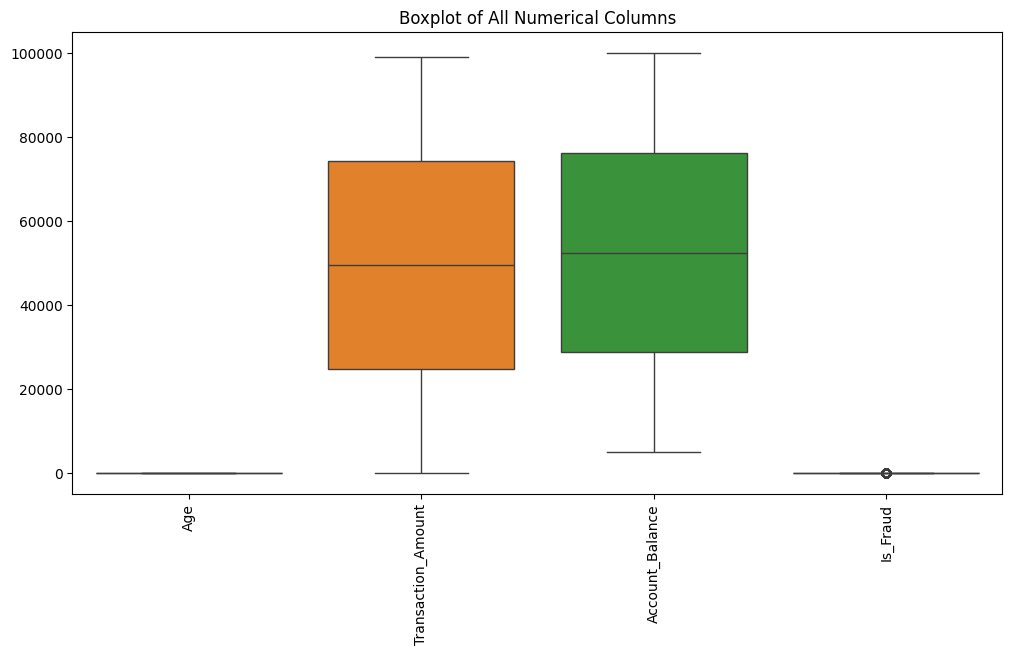

In [8]:
numerical_cols = data.select_dtypes(include=['number'])
plt.figure(figsize=(12, 6))
sns.boxplot(data=numerical_cols)
plt.xticks(rotation=90)
plt.title("Boxplot of All Numerical Columns")
plt.show()

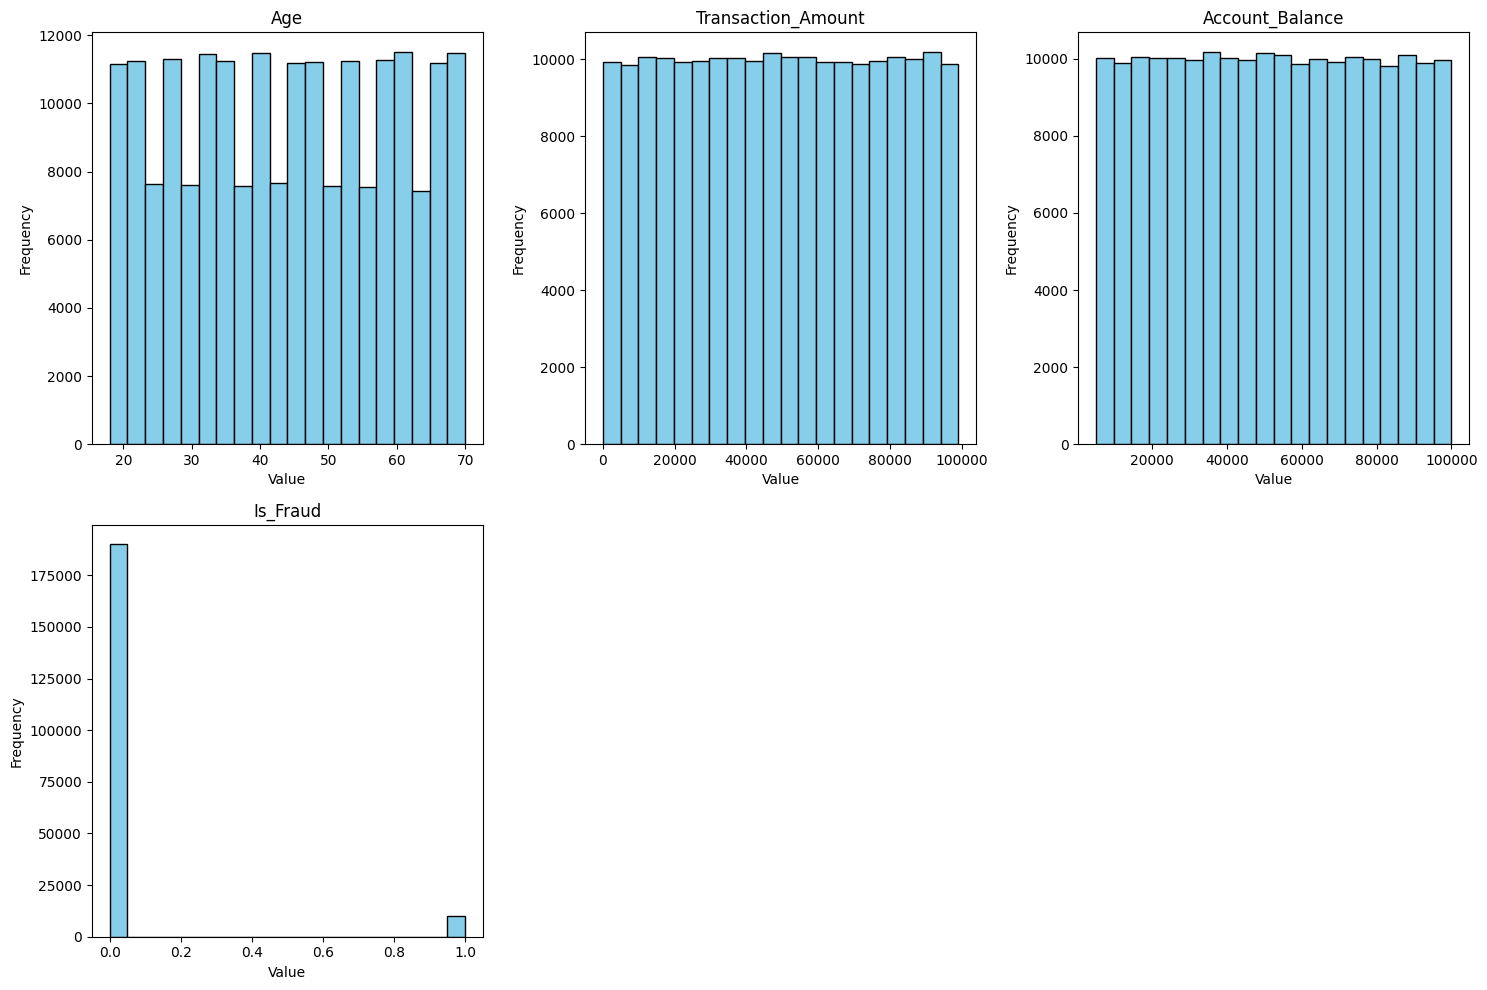

In [9]:
numerical_cols = data.select_dtypes(include=['number'])

num_cols = len(numerical_cols.columns)
fig, axes = plt.subplots(nrows=num_cols // 3 + 1, ncols=3, figsize=(15, num_cols * 2.5))
axes = axes.flatten()
for i, col in enumerate(numerical_cols.columns):
    axes[i].hist(data[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

for i in range(num_cols, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [10]:
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

<Axes: >

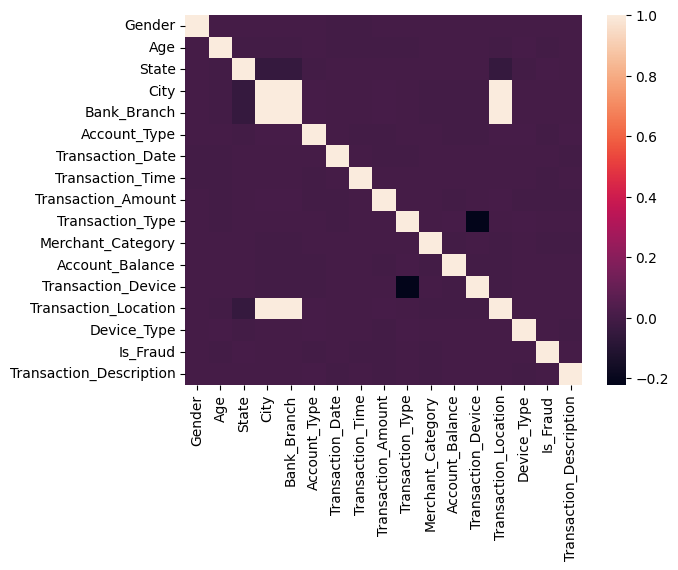

In [11]:
sns.heatmap(data.corr())

In [12]:
data.corr()

,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Date,Transaction_Time,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Description
Gender,1.000000,0.001692,0.002899,-0.000299,-0.000299,0.001260,-0.003731,-0.001941,0.001468,0.001339,0.002233,-0.000392,0.002109,-0.000261,-0.000534,0.000649,-0.000869
Age,0.001692,1.000000,-0.004638,-0.002284,-0.002284,-0.000281,-0.001401,-0.001294,-0.003087,-0.001291,-0.000381,0.000269,0.002429,-0.002291,0.004997,-0.001517,-0.000346
State,0.002899,-0.004638,1.000000,-0.046278,-0.046278,-0.002314,0.002415,0.000640,0.002480,-0.000130,0.001078,0.000136,0.001103,-0.044936,-0.001835,0.005716,0.001027
City,-0.000299,-0.002284,-0.046278,1.000000,1.000000,0.007245,0.002291,0.000812,0.005674,0.000101,-0.001047,-0.002628,-0.001441,0.999910,-0.000052,0.002800,0.001547
Bank_Branch,-0.000299,-0.002284,-0.046278,1.000000,1.000000,0.007245,0.002291,0.000812,0.005674,0.000101,-0.001047,-0.002628,-0.001441,0.999910,-0.000052,0.002800,0.001547
Account_Type,0.001260,-0.000281,-0.002314,0.007245,0.007245,1.000000,0.002025,-0.001731,-0.004737,0.001876,0.000169,-0.001506,-0.003000,0.007216,0.004613,-0.002592,0.005007
Transaction_Date,-0.003731,-0.001401,0.002415,0.002291,0.002291,0.002025,1.000000,0.000642,-0.001282,-0.001170,0.002922,0.001641,0.002933,0.002271,-0.000271,-0.000135,-0.003088
Transaction_Time,-0.001941,-0.001294,0.000640,0.000812,0.000812,-0.001731,0.000642,1.000000,0.001743,-0.000269,0.000318,0.002224,0.002040,0.000809,-0.000822,-0.001909,-0.000427
Transaction_Amount,0.001468,-0.003087,0.002480,0.005674,0.005674,-0.004737,-0.001282,0.001743,1.000000,0.001788,-0.000628,-0.001735,-0.000665,0.005656,-0.001315,-0.002100,-0.003523
Transaction_Type,0.001339,-0.001291,-0.000130,0.000101,0.000101,0.001876,-0.001170,-0.000269,0.001788,1.000000,0.002913,0.003874,-0.220293,0.000075,0.005041,0.000630,0.000065


In [13]:
models={
    "Random Forest Classifier":RandomForestClassifier(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Ada Boost Classifier":AdaBoostClassifier(),
    "Logistic Regression":LogisticRegression(),
    "Gradiant Boosting Classifier":GradientBoostingClassifier(),
    "Naive Bayes Classifier":GaussianNB()
}

In [14]:
x=data.drop(["Is_Fraud"],axis=1)
y=data["Is_Fraud"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [15]:
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall':[]
}
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall=recall_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    metrics['Model'].append(name)
    metrics['Accuracy'].append(acc * 100)
    metrics['Precision'].append(precision * 100)
    metrics['Recall'].append(recall * 100)
    print(f"Model: {name}")
    print(f"Accuracy: {acc*100}")
    print("-" * 30)

C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: Random Forest Classifier
Accuracy: 94.88600000000001
------------------------------
Model: Decision Tree Classifier
Accuracy: 88.768
------------------------------


C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: Ada Boost Classifier
Accuracy: 94.88600000000001
------------------------------


C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: Logistic Regression
Accuracy: 94.88600000000001
------------------------------
Model: Gradiant Boosting Classifier
Accuracy: 94.884
------------------------------
Model: Naive Bayes Classifier
Accuracy: 94.88600000000001
------------------------------


C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


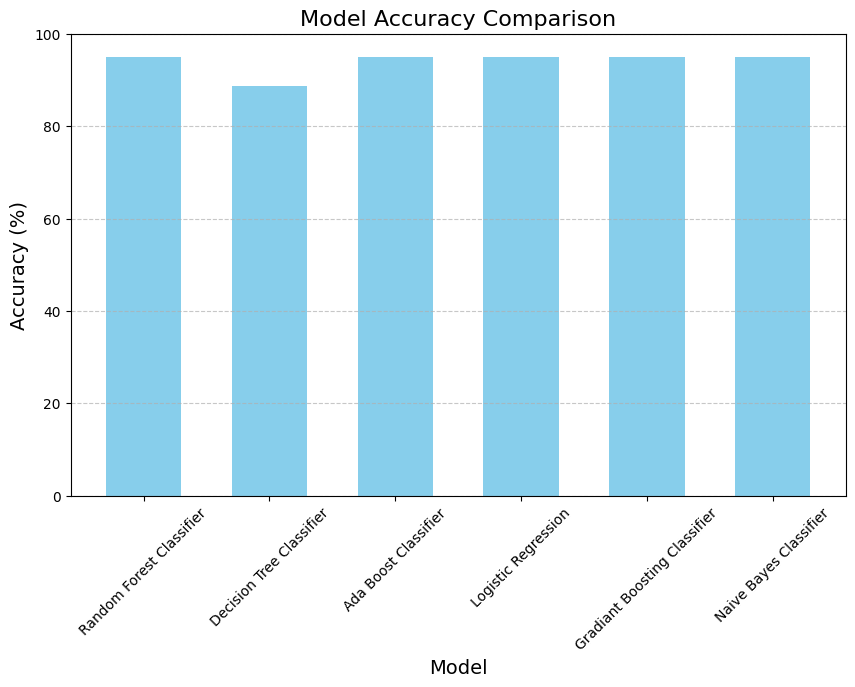

In [16]:
metrics_df = pd.DataFrame(metrics)
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Model'], metrics_df['Accuracy'], color='skyblue', width=0.6)
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()